<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/cifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
!git clone https://github.com/kartoone/DeepLearningPython nn

--2024-03-15 11:46:43--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  38.5MB/s    in 4.9s    

2024-03-15 11:46:48 (33.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [2]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [15]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def vectorize(label):
    result = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    result[label] = 1.
    return np.reshape(result, (10,1))

{b'batch_label': b'testing batch 1 of 1', b'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

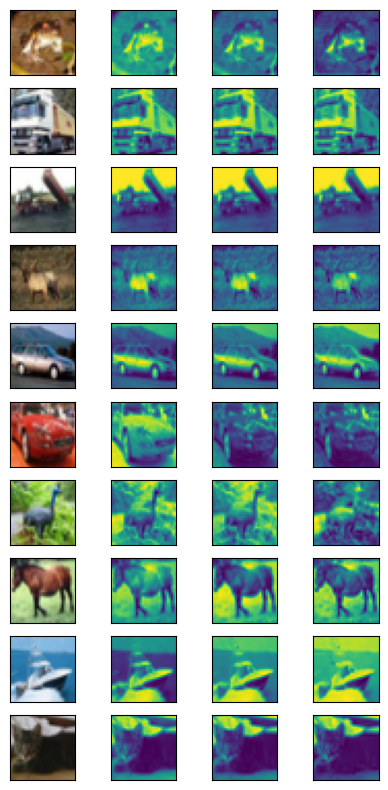

In [25]:
training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"cifar-10-batches-py/data_batch_{i}"
  dict = unpickle(filename)
#  print(dict)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

raw_test_data = unpickle("cifar-10-batches-py/test_batch")
print(raw_test_data)
red_test_data = [[np.reshape(d[:1024]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
green_test_data = [[np.reshape(d[1024:2048]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
blue_test_data = [[np.reshape(d[2048:]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
print(red_test_data[0][0])
print(red_test_data[0][1])
#print(len(training['labels']))
#print(len(training['data']))
#print(training['labels'][0])
#print(training['data'][0][:1024])
import numpy as np
np.set_printoptions(linewidth=1000000)
print(np.reshape(training['data'][0][:1024], (32,32)))
red_training_data = [[np.reshape(d[:1024]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
green_training_data = [[np.reshape(d[1024:2048]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
blue_training_data = [[np.reshape(d[2048:]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
print(red_training_data[0][0])
print(red_training_data[0][1])
training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(5,10))
for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(red_training_data[i][0],(32,32)))
  axes[i,2].imshow(np.reshape(green_training_data[i][0],(32,32)))
  axes[i,3].imshow(np.reshape(blue_training_data[i][0],(32,32)))
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])

In [27]:
import numpy as np
import nn.network as network
net_RED = network.Network([1024, 30, 10])
net_GREEN = network.Network([1024, 30, 10])
net_BLUE = network.Network([1024, 30, 10])

# modify the rawtrianing data labels so that they are vectorized
# create three sets of training data ... one set is the RED training data, etc...
net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
a = net_RED.feedforward(red_test_data[0][0])
print(a)

Epoch 0 : 1533 / 10000
Epoch 1 : 1811 / 10000
Epoch 2 : 1601 / 10000
Epoch 3 : 1899 / 10000
Epoch 4 : 2052 / 10000
Epoch 5 : 2269 / 10000
Epoch 6 : 1949 / 10000
Epoch 7 : 2103 / 10000
Epoch 8 : 2346 / 10000
Epoch 9 : 2135 / 10000
Epoch 10 : 2248 / 10000
Epoch 11 : 2294 / 10000
Epoch 12 : 2414 / 10000
Epoch 13 : 2217 / 10000
Epoch 14 : 1979 / 10000
Epoch 15 : 2338 / 10000
Epoch 16 : 2466 / 10000
Epoch 17 : 2424 / 10000
Epoch 18 : 2292 / 10000
Epoch 19 : 2235 / 10000
Epoch 20 : 2429 / 10000
Epoch 21 : 2460 / 10000
Epoch 22 : 2524 / 10000
Epoch 23 : 2375 / 10000
Epoch 24 : 2526 / 10000
Epoch 25 : 2499 / 10000
Epoch 26 : 2277 / 10000
Epoch 27 : 2508 / 10000
Epoch 28 : 2454 / 10000
Epoch 29 : 2596 / 10000
[[0.29453959]
 [0.06867418]
 [0.04936966]
 [0.03380698]
 [0.05384389]
 [0.01038279]
 [0.04950303]
 [0.07864668]
 [0.41085221]
 [0.02041872]]
